In [2]:
# from torch.utils.data import DataLoader
# from torchvision import transforms
# import medicalDataLoader
from utils import *
# from multi_UNet_complex import *
# from UNet_Base import *

In [3]:
import torch

# Select GPU if available, else CPU
device = torch.device('cpu')
print(device)

cpu


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Look training.py

# def lossFunction(loss1,loss2,alpha:float,predictions, y_hat_1, y_hat_2):
#     if(alpha>1 or alpha<0):
#         Exception("alpha is outside [0;1]")
#     _loss1 = loss1(predictions, y_hat_1)
#     _loss2 = loss2(predictions, y_hat_2)
#     return alpha * _loss1 + (1-alpha) * _loss2

## Supervised

### Learning rate using 5 epochs and UNet Base

- `CosineAnnealingLR` 
    ![CosineAnnealingLR_32.png](./img/CosineAnnealingLR_32.png)
- `LambdaLR` 
    ![LambdaLR_16.png](./img/LambdaLR_16.png)
    ![LambdaLR_32.png](./img/LambdaLR_32.png)

### Learning rate using 5 epochs and UNet Complexe

Schedulers :
- `CosineAnnealingLR` 
    ![learning_CosineAnnealingLR_32.png](./img/learning_CosineAnnealingLR_32.png)
- `LambdaLR` 
    ![learning_LambdaLR_16.png](./img/learning_LambdaLR_16.png)
    ![learning_LambdaLR_32.png](./img/learning_LambdaLR_32.png)

In [6]:
# Look training.py

# def runTraining(epoch_num, weights_path='', augm = False):
#     print('-' * 40)
#     print('~~~~~~~~  Starting the training... ~~~~~~')
#     print('-' * 40)

#     ## DEFINE HYPERPARAMETERS (batch_size > 1)
#     batch_size = 16
#     batch_size_val = 16
#     lr = 0.001   # Learning Rate
#     epoch = epoch_num # Number of epochs

#     root_dir = './Data/'

#     print(' Dataset: {} '.format(root_dir))

#     ## DEFINE THE TRANSFORMATIONS TO DO AND THE VARIABLES FOR TRAINING AND VALIDATION

#     transform = transforms.Compose([
#         transforms.ToTensor()
#     ])

#     mask_transform = transforms.Compose([
#         transforms.ToTensor()
#     ])

#     train_set_full = medicalDataLoader.MedicalImageDataset('train',
#                                                       root_dir,
#                                                       transform=transform,
#                                                       mask_transform=mask_transform,
#                                                       augment=augm,  # Set to True to enable data augmentation
#                                                       equalize=False)

#     train_loader_full = DataLoader(train_set_full,
#                               batch_size=batch_size,
#                               worker_init_fn=np.random.seed(0),
#                               num_workers=0,
#                               shuffle=True)


#     val_set = medicalDataLoader.MedicalImageDataset('val',
#                                                     root_dir,
#                                                     transform=transform,
#                                                     mask_transform=mask_transform,
#                                                     equalize=False)

#     val_loader = DataLoader(val_set,
#                             batch_size=batch_size_val,
#                             worker_init_fn=np.random.seed(0),
#                             num_workers=0,
#                             shuffle=False)


#     ## INITIALIZE YOUR MODEL
#     num_classes = 4 # NUMBER OF CLASSES

#     print("~~~~~~~~~~~ Creating the UNet model ~~~~~~~~~~")
#     modelName = 'Test_Model'
#     print(" Model Name: {}".format(modelName))

#     ## CREATION OF YOUR MODEL
#     net = ComplexUNet(num_classes)

#     #net = UNet(num_classes)
#     net = net.to(device)  # Move the model to the device

#     ## Load the weights from the previously trained model
#     if weights_path != '':
#         # previous_model_dir = './models/' + 'Test_Model' + '/' + str(epoch_num) +'_Epoch'
#         net.load_state_dict(torch.load(weights_path))
#         print(" Model loaded: {}".format(weights_path))

#     print("Total params: {0:,}".format(sum(p.numel() for p in net.parameters() if p.requires_grad)))

#     # DEFINE YOUR OUTPUT COMPONENTS (e.g., SOFTMAX, LOSS FUNCTION, ETC)
#     softMax = torch.nn.Softmax(dim=1)
#     CE_loss = torch.nn.CrossEntropyLoss()
#     DiceLossV2Train = DiceLossV2(n_classes=4)

#     ## PUT EVERYTHING IN GPU RESOURCES
#     if torch.cuda.is_available():
#         net.cuda()
#         softMax.cuda()
#         CE_loss.cuda()

#     ## DEFINE YOUR OPTIMIZER
#     optimizer = torch.optim.Adam(net.parameters(), lr=lr)
#     lambda1 = lambda epoch: 0.95 ** epoch
#     scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)


#     ### To save statistics ####
#     lossTotalTraining = []
#     lossTotalVal = []
#     Best_loss_val = 1000
#     BestEpoch = 0
#     lrs = []
#     patience = 3

#     directory = 'Results/Statistics/' + modelName

#     print("~~~~~~~~~~~ Starting the training ~~~~~~~~~~")
#     if os.path.exists(directory)==False:
#         os.makedirs(directory)

#     ## START THE TRAINING

#     ## FOR EACH EPOCH
#     for i in range(epoch):
#         net.train()
#         lossEpoch = []
#         lrEpoch = []
#         num_batches = len(train_loader_full)

#         ## FOR EACH BATCH
#         for j, data in enumerate(train_loader_full):
#             ### Set to zero all the gradients
#             net.zero_grad()
#             optimizer.zero_grad()

#             ## GET IMAGES, LABELS and IMG NAMES
#             images = data[0]
#             labels = data[1]
#             # img_names = data[2]

#             ### From numpy to torch variables
#             labels = to_var(labels)
#             images = to_var(images)

#             ################### Train ###################
#             #-- The CNN makes its predictions (forward pass)
#             net_predictions = net.forward(images)
#             s_pred = softMax(net_predictions)
#             #-- Compute the losses --#
#             # THIS FUNCTION IS TO CONVERT LABELS TO A FORMAT TO BE USED IN THIS CODE

#             segmentation_classes = getTargetSegmentation(labels)
#             seg_one_hot = F.one_hot(segmentation_classes ,num_classes=4).permute(0, 3, 1, 2).float()

#             # COMPUTE THE LOSS
#             #pred_one = predToSegmentation(s_pred)
#             #CE_loss_value = 0.4 * CE_loss(net_predictions, seg_one_hot) + 0.6 * DiceLossV2Train(net_predictions ,segmentation_classes, softmax=True)# XXXXXX and YYYYYYY are your inputs for the CE
#             loss = lossFunction(CE_loss,DiceLossV2Train,0.4,s_pred,seg_one_hot,segmentation_classes)

#             lossTotal = loss
#             # DO THE STEPS FOR BACKPROP (two things to be done in pytorch)
#             loss.backward()
#             optimizer.step()


#             # Update LR
#             #scheduler.step()
#             lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
#             lrEpoch.append(lr_step)

#             # THIS IS JUST TO VISUALIZE THE TRAINING
#             lossEpoch.append(lossTotal.cpu().data.numpy())

#             #scheduler.step()
#             printProgressBar(j + 1, num_batches,
#                              prefix="[Training] Epoch: {} ".format(i),
#                              length=15,
#                              suffix=" Loss: {:.4f}, lr: {} ".format(lossTotal,lr_step))

#         lossEpoch = np.asarray(lossEpoch)
#         lossEpoch = lossEpoch.mean()

#         lossVal = inference(net, val_loader, "modele", i)
#         scheduler.step()
#         lossTotalVal.append(lossVal)
#         lossTotalTraining.append(lossEpoch)

#         lrEpoch = np.asarray(lrEpoch)
#         lrEpoch = lrEpoch.mean()
#         lrs.append(lrEpoch)

#         printProgressBar(num_batches, num_batches,
#                              done="[Training] Epoch: {}, LossT: {:.4f}, LossV: {:.4f}".format(i, lossEpoch, lossVal))

#         if not os.path.exists('./models/' + modelName):
#                 os.makedirs('./models/' + modelName)

#         if lossVal > Best_loss_val:
#                 trigger_times += 1
#                 print('trigger times:', trigger_times)


#                 if trigger_times >= patience:
#                     print('Early stopping!\nStart to test process.')
#                     torch.save(net.state_dict(), './models/' + modelName + '/' + str(i) + '_Epoch')
#                     break
#         else:
#             print('trigger times: 0')
#             trigger_times = 0
#         torch.save(net.state_dict(), './models/' + modelName + '/' + str(i) + '_Epoch')
#         Best_loss_val = lossVal
#     return lossTotalTraining, lossTotalVal, batch_size, batch_size_val, lrs, lr


In [8]:
from training import *
lossTotalTraining, lossTotalVal, batch_size, batch_size_val, lrs, lr = runTraining(5)

----------------------------------------
~~~~~~~~  Starting the training... ~~~~~~
----------------------------------------
 Dataset: ./Data/ 
~~~~~~~~~~~ Creating the UNet model ~~~~~~~~~~
 Model Name: Test_Model
Total params: 7,068,708
~~~~~~~~~~~ Starting the training ~~~~~~~~~~
[Training] Epoch: 0 [DONE]                                           


TypeError: inference() missing 1 required positional argument: 'loss_function'

In [ ]:
print(f"Losses Training : {lossTotalTraining}")
print(f"Losses Validation : {lossTotalVal}")

Losses Training : [0.97390497, 0.8503471, 0.7753881, 0.72712636, 0.68170834]
Losses Validation : [1.9723103, 0.8130021, 0.6851669, 0.5517632, 0.41979942]


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

transform = transforms.Compose([
        transforms.ToTensor()
    ])

mask_transform = transforms.Compose([
        transforms.ToTensor()
    ])

train_set_full = medicalDataLoader.MedicalImageDataset('train',
                                                           root_dir,
                                                           transform=transform,
                                                           mask_transform=mask_transform,
                                                           augment=augm,  # Set to True to enable data augmentation
                                                           equalize=False)

train_loader_full = DataLoader(train_set_full,
                                   batch_size=batch_size,
                                   worker_init_fn=np.random.seed(0),
                                   num_workers=0,
                                   shuffle=True)


for j, data in enumerate(train_loader_full):
    images, labels = data
    
    y_pred = 
    cm = confusion_matrix()


In [ ]:
import matplotlib.pyplot as plt

def get_Training_learning(training_loss,validation_loss, learning_rate, all_learning_rate,
                          training_batch_size,validation_batch_size,opt_name = "Adam"):

    # validation_loss.pop(0)
    # training_loss.pop(0)
    files = os.listdir('./models/Test_Model')

    epochs = range(len(files))

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, training_loss, 'r', label='Training loss')
    plt.plot(epochs, validation_loss, 'b', label='Validation loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    info_text = (
        f"Learning Rate: {learning_rate:.5f}\n"
        f"All Learning Rates: {', '.join(map(str, all_learning_rate))}\n"
        f"Training Batch Size: {training_batch_size}\n"
        f"Validation Batch Size: {validation_batch_size}\n"
        f"Optimizer: {opt_name}"
    )

    plt.annotate(info_text, xy=(0.02, 0.92), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white"))

    plt.savefig("./Results/learning.png")
    plt.show()

In [ ]:
type(lossTotalVal)

list

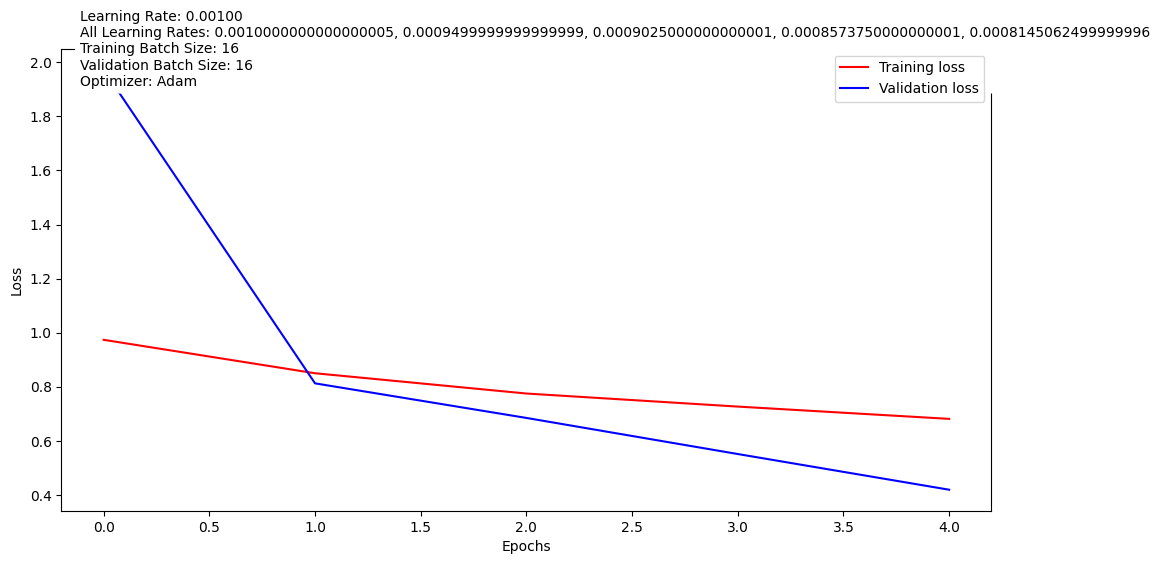

In [ ]:
get_Training_learning(lossTotalTraining,lossTotalVal, lr, lrs, batch_size,batch_size_val,opt_name = "Adam")

In [ ]:
# Testing the model on an Image

from PIL import Image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt


def plotOutput(model_path, image_path):

    ## CREATION OF YOUR MODEL
    net_test = ComplexUNet(4)
    net_test = net_test.to(device)
    net_test.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    # Load the image
    image = Image.open(image_path)

    # Convert the image to grayscale
    if image.mode != 'L':
        image = image.convert('L')

    # Preprocess the image
    x = TF.to_tensor(image)
    x = TF.normalize(x, [0.5], [0.5])
    x = x.unsqueeze(0)  # Add batch dimension

    # Move the tensor to the same device as the model
    x = x.to(device)

    output = net_test(x)

    # The output is the predicted segmentation
    predicted_segmentation = torch.argmax(output.squeeze(), dim=0)

    # Convert the tensor to a numpy array
    predicted_segmentation = predicted_segmentation.detach().cpu().numpy()

    # Display the predicted segmentation
    plt.imshow(predicted_segmentation, cmap='gray')
    plt.show()

In [ ]:
# Displaying the outputs for different models

models_paths = ['./models/' + 'Trained/2nd_model_simple_multi_unet_model/Data_Augmented/Augmented_' + str(i) + 'x' for i in range(6)]
import torch

image_path = "./Data/val/Img/patient001_12_2.png"
#plotOutput('./models/' + 'Test_Model1/19_Epoch', image_path)
plotOutput('./models/' + 'Test_Model/9evalStagne_Epoch', image_path)
#plotOutput('./models/' + 'Trained/2nd_model_simple_multi_unet_model/Data_Augmented/Augmented_5x', image_path)


FileNotFoundError: [Errno 2] No such file or directory: './models/Test_Model/9evalStagne_Epoch'